In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,skewtest
from sklearn.impute import KNNImputer
from collections import Counter
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* We can see that we have some missing values there and they all showing with 0 so we don't know how many. Let's check other things about our data and then we can replace our missing values, in this case 0's, with NaN's.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


* Yes, we have missing data but which columns? We can see here that our Glucose, BloodPressure, SkinThcikness, Insulin and BMI features all have minimum values 0. This can't be right? Now we also found which features have missing values.

In [5]:
data.columns
# I checked that if features has space or not in their names. We dont want to search for mistakes later.

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.nan)
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


* So Glucose doesnt have much values alose BloodPressure too. But SkinThickness has one forth of data missing and Insulin is almost fourty percent missing value too. Before we dive in to our models and so we need to fill these missing values.

* What are the choices we have here?

* We have few ways that filling missing values but before that let's check our data distributions to understand our data.

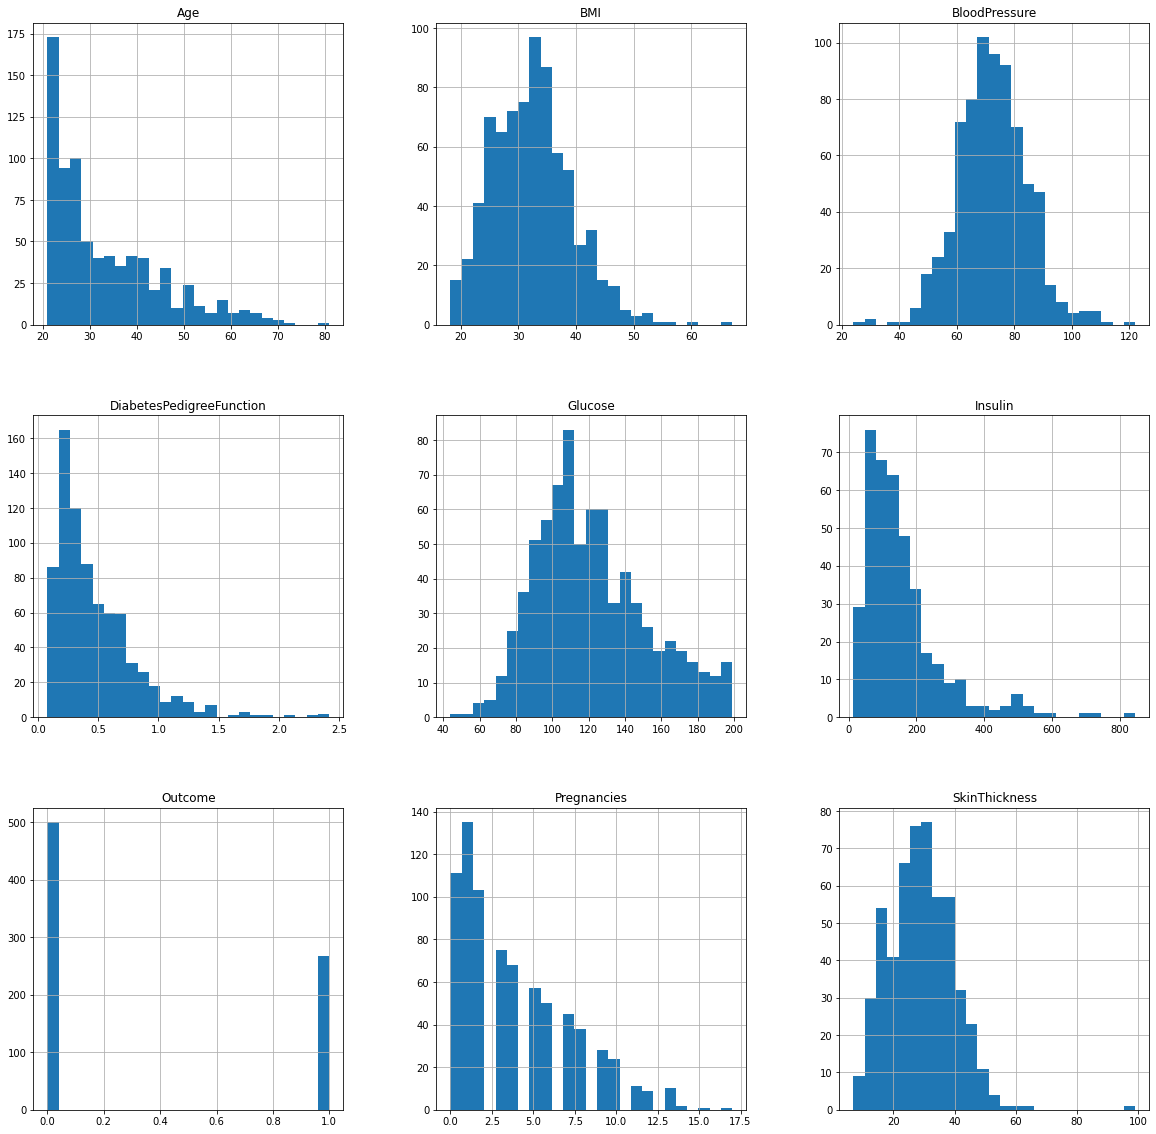

In [9]:
p = data.hist(figsize = (20,20),bins=25)
plt.show()

* Well, it's seems like we have some skewness in our data distributions. 
* What is skewness?
* Skewness is asymmetry in a statistical distribution, in which the curve appears distorted or skewed either to the left or to the right. Skewness can be quantified to define the extent to which a distribution differs from a normal distribution.
* Now let's check our distributions to outcomes, and see if we have same distribution.

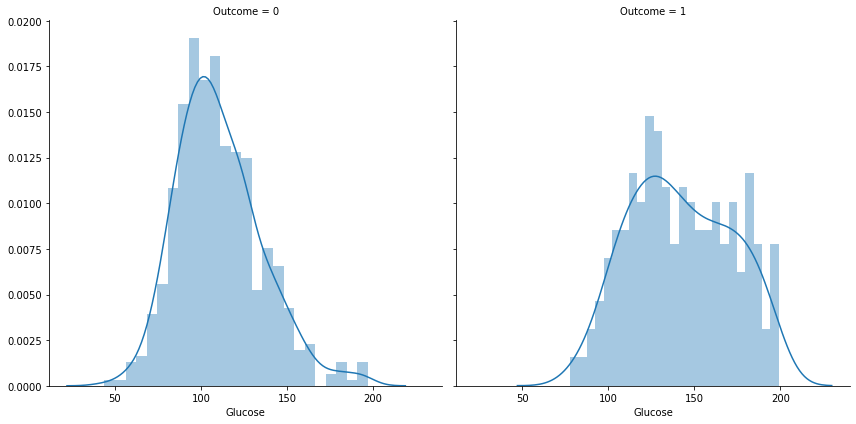

In [10]:
c = sns.FacetGrid(data,col="Outcome",height=6)
c.map(sns.distplot,"Glucose",bins=25)
plt.show()

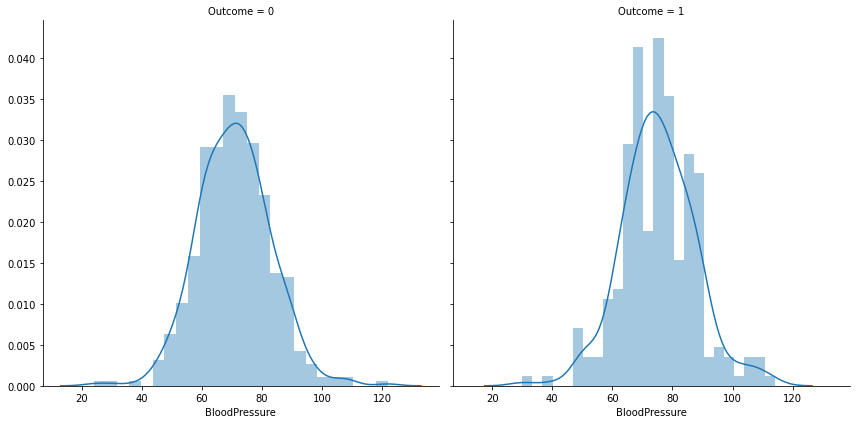

In [11]:
c = sns.FacetGrid(data,col="Outcome",height=6)
c.map(sns.distplot,"BloodPressure",bins=25)
plt.show()

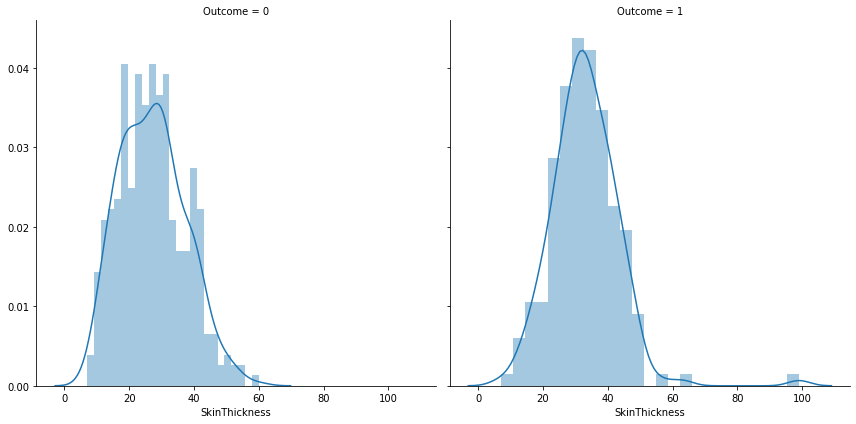

In [12]:
c = sns.FacetGrid(data,col="Outcome",height=6)
c.map(sns.distplot,"SkinThickness",bins=25)
plt.show()

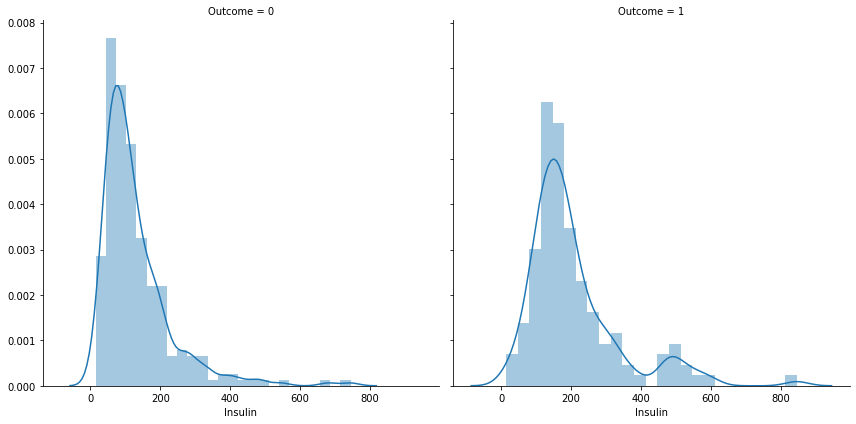

In [13]:
c = sns.FacetGrid(data,col="Outcome",height=6)
c.map(sns.distplot,"Insulin",bins=25)
plt.show()

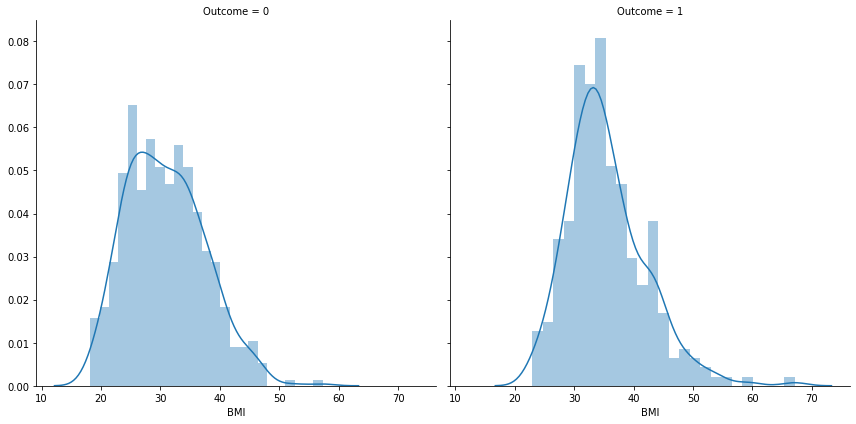

In [14]:
c = sns.FacetGrid(data,col="Outcome",height=6)
c.map(sns.distplot,"BMI",bins=25)
plt.show()

* We have somewhat identical distributions. 
* Now let's check our correlation map and fill our missing values.

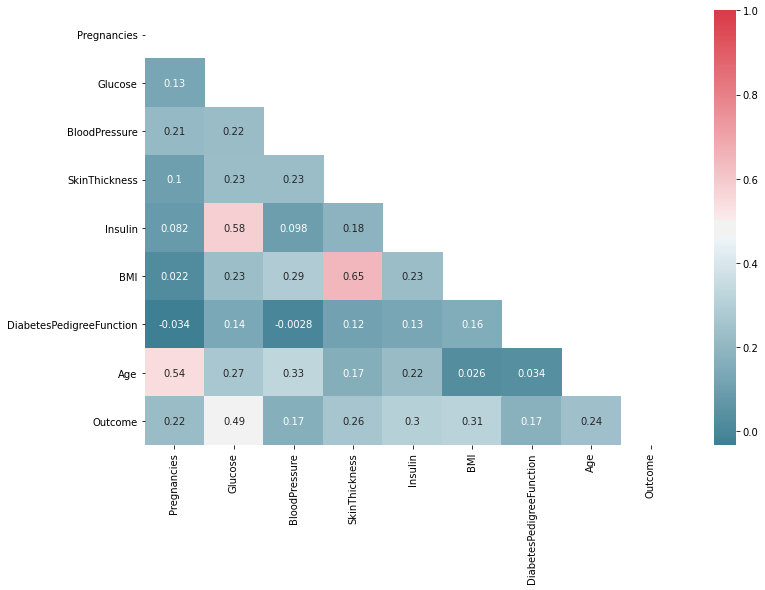

In [15]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax,)
plt.show()

### Fill Missing Value
* So like i said, we have a few ways to fill our values. Calculating mean or median of each missing column is a way, and mostly preferred way. But with that much skewness in data if we add more that wont be good for us.
* Let's use a different approach and use KNNImputer, and see if we have improvement.

In [16]:
imputer = KNNImputer(n_neighbors=5)
data_filled = imputer.fit_transform(data)
data_filled_df = pd.DataFrame(data_filled, index=data.index,columns=data.columns)

In [17]:
data_filled_df.isnull().sum()
# All missing values are filled.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

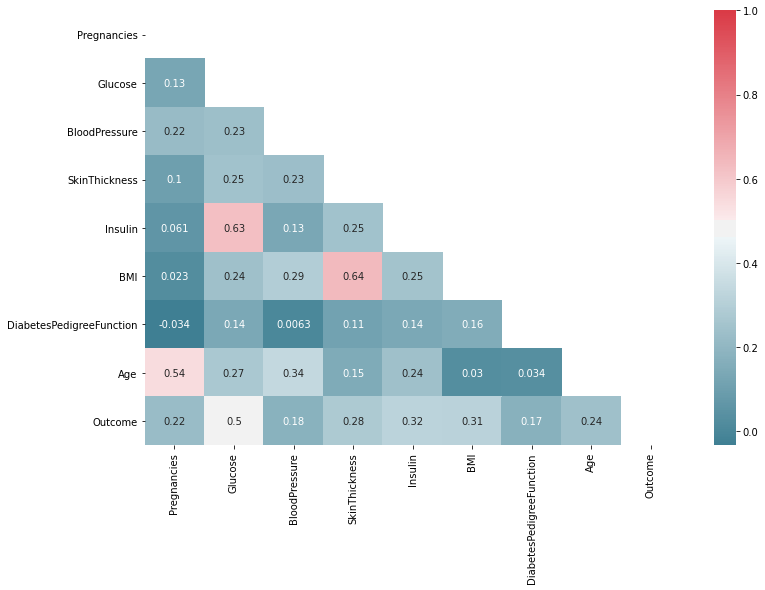

In [18]:
corr = data_filled_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax,)
plt.show()

* Now, we replaced all our missing values using KNNImputer. After the change, our correlation values have slightly changed. 
* We have our missing values filled, now we can start to build our models.

### Modeling

In [19]:
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

* After we scale our data, we'll do a quick and simple KNN fit and see our accuracy.

In [20]:
X = data_filled_df.drop("Outcome",axis=1)
y = data_filled_df["Outcome"]

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

print("Train Accuracy: ",knn.score(X_train,y_train))
print("Test Accuracy: ",knn.score(X_test,y_test))

Train Accuracy:  0.8249534450651769
Test Accuracy:  0.6753246753246753


* Now our results are not satisfying, like expected. We have 67% test accuracy. Let's tune our hyperparameters with Grid Search and see where it goes.

### Hyperparameter Tuning, Grid Search

In [30]:
random_state = 42
classifier = [SVC(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier(),
             xgb.XGBClassifier(seed=123, objective="reg:logistic")]

svc_params = {"kernel" : ["rbf"],
              "gamma": [0.001, 0.01, 0.1, 1],
              "C": [1,10,50,100,200,300,1000]}

logreg_params = {"C":np.logspace(-3,3,7),
                 "penalty": ["l1","l2"]}

knn_params = {"n_neighbors": np.arange(1,20,1),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan","minkowski"]}

xgb_params = {"n_estimators": np.arange(1,15,1),
              "max_depth" : np.arange(1,10,1),
              "num_boost_round": np.arange(1,10,1)}

classifier_params = [svc_params,
                    logreg_params,
                    knn_params,
                    xgb_params]

In [31]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_params[i], cv = 5, scoring = "accuracy", n_jobs = -1,verbose=1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7746452059536172
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7690204222914503
Fitting 5 folds for each of 114 candidates, totalling 570 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 570 out of 570 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7802180685358255
Fitting 5 folds for each of 1134 candidates, totalling 5670 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 4616 tasks      | elapsed:   17.7s


0.785687088958117


[Parallel(n_jobs=-1)]: Done 5670 out of 5670 | elapsed:   22.6s finished


              ML Models  Cross Validation Means
0                   SVM                0.774645
1    LogisticRegression                0.769020
2  KNeighborsClassifier                0.780218
3         XGBClassifier                0.785687


Text(0.5, 1.0, 'Cross Validation Scores')

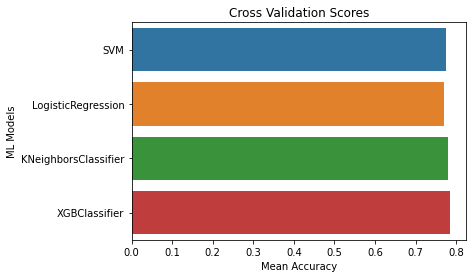

In [38]:
cv_results = pd.DataFrame({"ML Models":["SVM",
                                        "LogisticRegression",
                                        "KNeighborsClassifier",
                                        "XGBClassifier"],
                           "Cross Validation Means":cv_result})
print(cv_results)


g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

* So we improved our accuracy 10% with hyperparameter tuning, and the best one is XGBClassifier with 78.5% accuracy. 

* And thanks for all readers, this is my first notebook so if you've found any mistakes please tell me so i can improve myself. 